In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read data from csv into Pandas DataFrame
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# See how the train data looks like
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Get a short brief of the dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### We notice that not all columns have the 614 entries (Gender, Married, Dependents, Self_Employed etc.) meaning there are missing data in the dataframe. We'll handle that later.

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 1.0 Univariate Analysis

### 1.1 Categorical Features

In [8]:
# First, the target variable
train_data['Loan_Status'].value_counts() #to get counts of unique values.

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train_data['Loan_Status'].value_counts(normalize=True) #to get the relative frequencies of the unique values

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

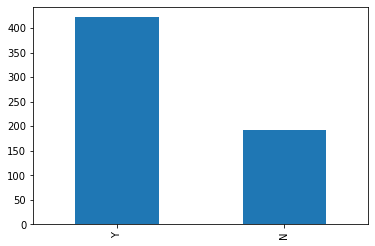

In [10]:
train_data['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:>

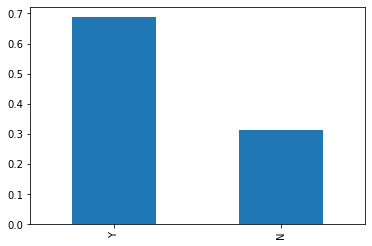

In [11]:
train_data['Loan_Status'].value_counts(normalize=True).plot.bar()

We can deduce that 422 out of 614 (about 68.7%) had their loans approved.

### Gender

In [12]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


<AxesSubplot:>

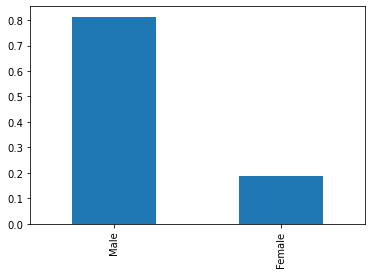

In [13]:
print(train_data['Gender'].value_counts(normalize=True))
train_data['Gender'].value_counts(normalize=True).plot.bar()

### Married

In [14]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Yes    0.651391
No     0.348609
Name: Married, dtype: float64


<AxesSubplot:>

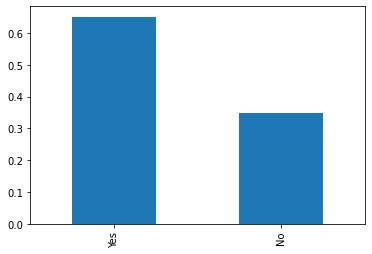

In [15]:
print(train_data['Married'].value_counts(normalize=True))
train_data['Married'].value_counts(normalize=True).plot.bar()

### Self_Employed

In [16]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


<AxesSubplot:>

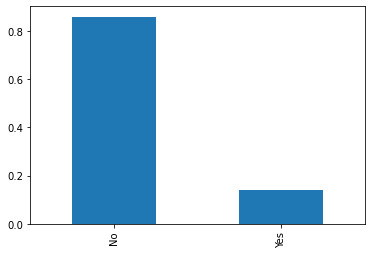

In [17]:
print(train_data['Self_Employed'].value_counts(normalize=True))
train_data['Self_Employed'].value_counts(normalize=True).plot.bar()

### 1.2 Ordinal Features

### Credit_History

In [18]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


<AxesSubplot:>

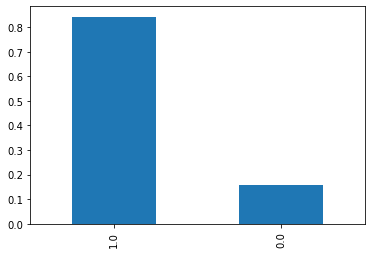

In [19]:
print(train_data['Credit_History'].value_counts(normalize=True))
train_data['Credit_History'].value_counts(normalize=True).plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

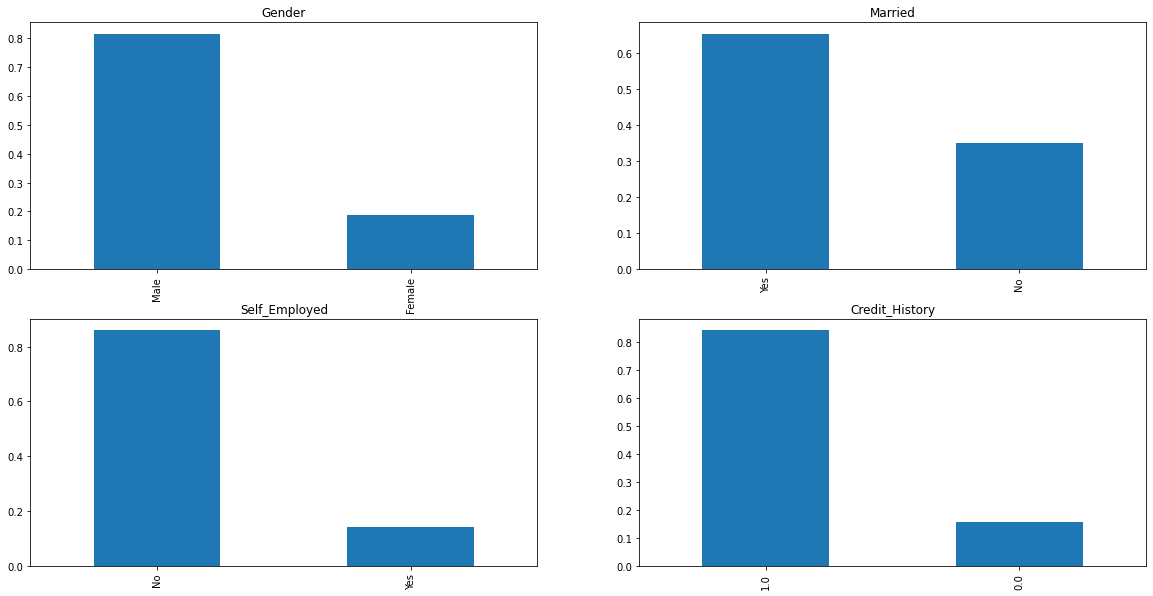

In [20]:
plt.figure(1)

plt.subplot(221)
train_data['Gender'].value_counts(normalize=True).plot.bar(title = "Gender", figsize = (20,10))

plt.subplot(222)
train_data['Married'].value_counts(normalize=True).plot.bar(title = "Married")

plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title = "Self_Employed")

plt.subplot(224)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title = "Credit_History")

<AxesSubplot:title={'center':'Property_Area'}>

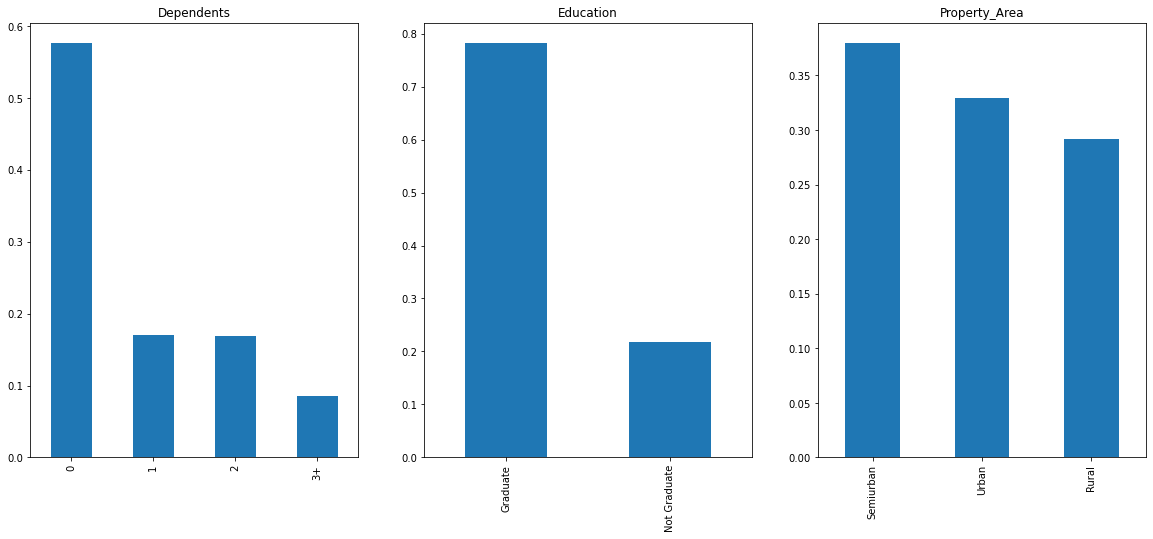

In [21]:
plt.figure(1)

plt.subplot(131)
train_data['Dependents'].value_counts(normalize=True).plot.bar(title = "Dependents", figsize = (20,8))

plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title = "Education")

plt.subplot(133)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title = "Property_Area")


### 1.3 Numerical Features

### Applicant Income

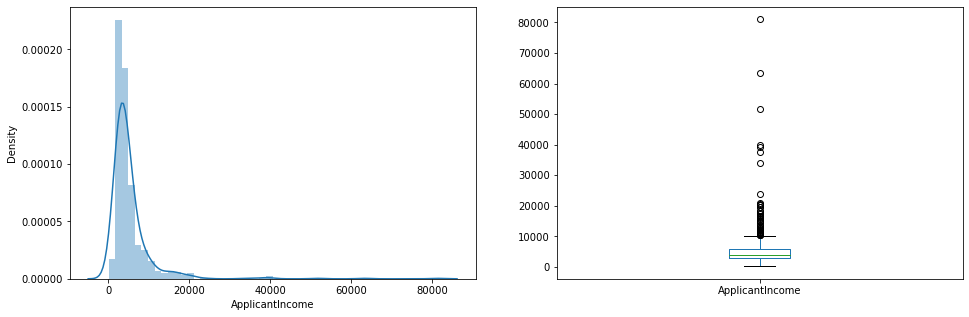

In [22]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train_data['ApplicantIncome']);

plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

### CoApplicant Income

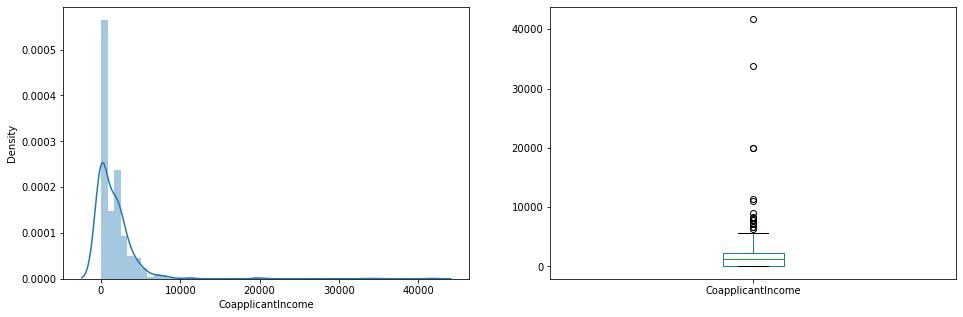

In [23]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome']);

plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

### LoanAmount

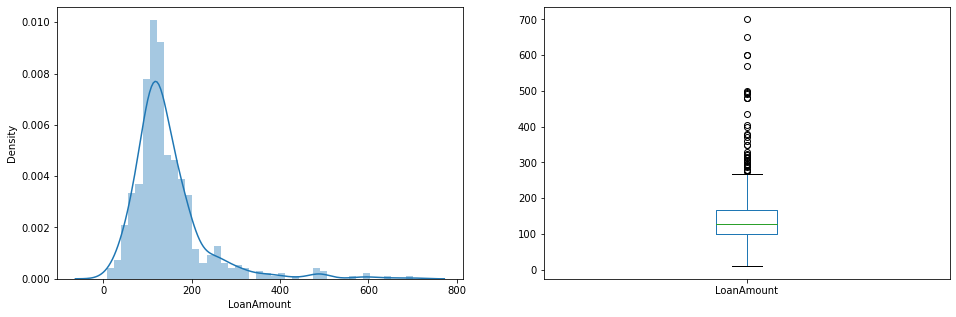

In [24]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train_data['LoanAmount']);

plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

## 2.0 Bivariate Analysis

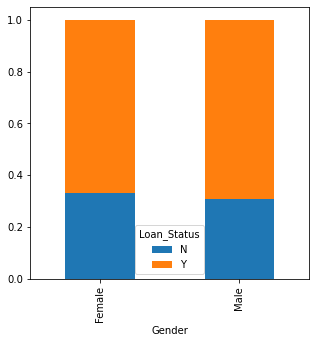

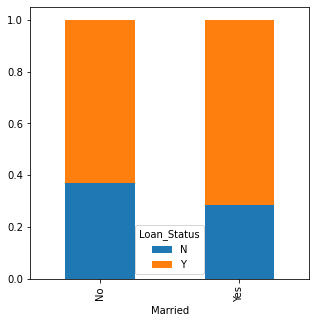

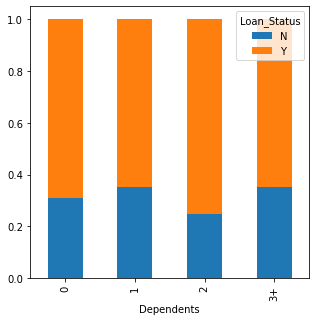

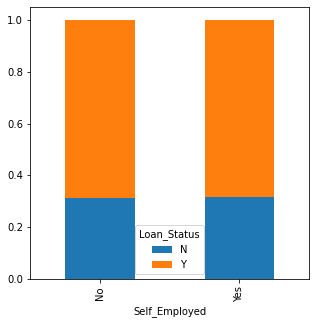

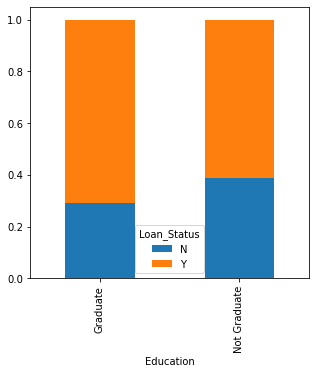

In [25]:
gender = pd.crosstab(train_data['Gender'], train_data['Loan_Status'])
married = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
dependents = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
self_employed = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])
education = pd.crosstab(train_data['Education'], train_data['Loan_Status'])

gender.div(gender.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))
plt.show()

married.div(married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))
plt.show()

dependents.div(dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))
plt.show()

self_employed.div(self_employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))
plt.show()

education.div(education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (5,5))
plt.show()

To find the correlation between the target variable (Loan_Status), we replace the 3+ in the dependents variable to 3 to make it numerical and change the Y and N to 0 and 1 in the target variable 

In [26]:
train_data['Dependents'].replace('3+', '3', inplace=True)
test_data['Dependents'].replace('3+', '3', inplace=True)
train_data['Loan_Status'].replace('N', '0', inplace=True)
train_data['Loan_Status'].replace('Y', '1', inplace=True)

train_data #show the updates

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [27]:
corr = train_data.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

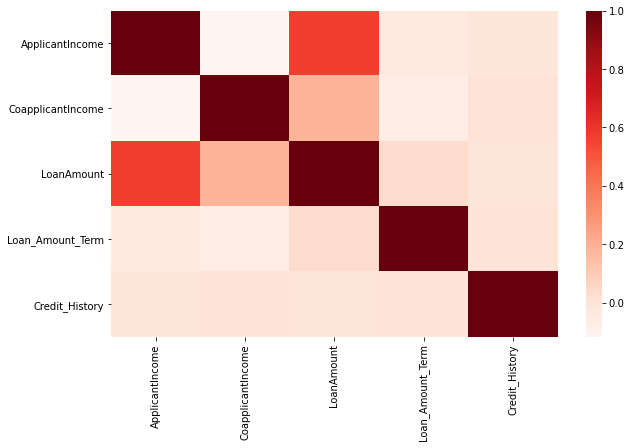

In [28]:
# To see the correlation, let's use an heatmap
f, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr, vmax= 1, cmap= "Reds")

The most correlated variables are LoanAmount-Applicant Income and LoanAmount-CoApplicantIncome

## Handling Missing Values

In [32]:
train_data.isnull().sum() #show the number of missing values for each variable.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender has 13 missing values, Married has 3 and so on.
We can fill these missing values using Mean, Median or Mode.

In [40]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace= True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace= True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace= True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace= True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace= True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace= True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace= True) #numerical variable

In [41]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##  Handling Outliers

We saw earlier that the LoanAmount is rightly-skewed. This shows plenty outliers. We can make the transformation fairly normal by taking a log transformation.

<AxesSubplot:>

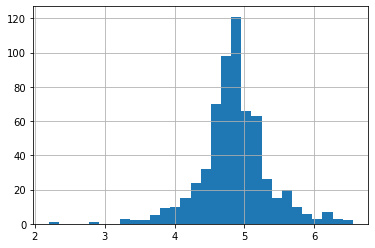

In [45]:
train_data['LoanAmount_LogTransform'] = np.log(train_data['LoanAmount'])
test_data['LoanAmount_LogTransform'] = np.log(test_data['LoanAmount'])

train_data['LoanAmount_LogTransform'].hist(bins = 30)

The distribution looks fairly normal now. We can now use our machine learning models on the dataset.

## Modelling

### Logistic Regression

In [46]:
# we drop the Loan_ID column
train_data = train_data.drop('Loan_ID', axis = 1)
test_data = test_data.drop('Loan_ID', axis = 1)

In [48]:
X = train_data.drop('Loan_Status', 1)
y = train_data['Loan_Status']

In [49]:
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C = 1.0, random_state=1, solver='liblinear', penalty='l1')
model.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [60]:
pred_cv = model.predict(x_cv)

In [61]:
accuracy_score(y_cv, pred_cv)

0.8162162162162162

In [69]:
pred_test = model.predict(test_data)

In [68]:
test_data.dropna(inplace= True)

We can do some Feature Engineering

In [71]:
train_data['Total_Amount'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['Loan_Amount_Term_By_Amt'] = train_data['LoanAmount'] / train_data['Loan_Amount_Term']

test_data['Total Amount'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Loan_Amount_Term_By_Amt'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term']

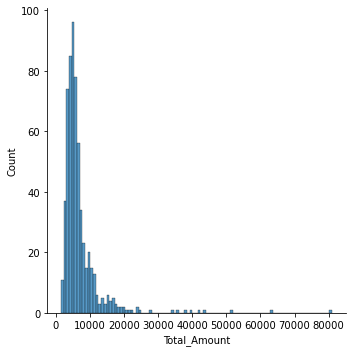

In [72]:
sns.displot(train_data.Total_Amount);

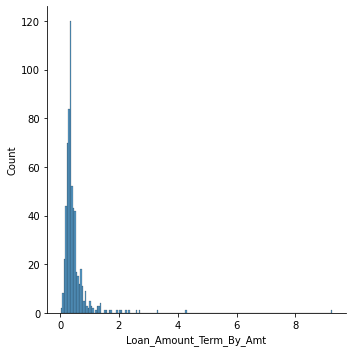

In [73]:
sns.displot(train_data.Loan_Amount_Term_By_Amt);

In [75]:
# we need to drop the variables used to 
train_data = train_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test_data = test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [76]:
train_data

,Credit_History,LoanAmount_LogTransform,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_0,Loan_Status_1,Total Amount,Loan_Amount_Term_By_Amt,Total_Amount
0,1.0,4.852030,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,5849.0,0.355556,5849.0
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,6091.0,0.355556,6091.0
2,1.0,4.189655,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,1,3000.0,0.183333,3000.0
3,1.0,4.787492,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,1,4941.0,0.333333,4941.0
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,6000.0,0.391667,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,4.262680,1,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,2900.0,0.197222,2900.0
610,1.0,3.688879,0,1,0,1,0,0,0,1,...,1,0,1,0,0,0,1,4106.0,0.222222,4106.0
611,1.0,5.533389,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,8312.0,0.702778,8312.0
612,1.0,5.231109,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,7583.0,0.519444,7583.0
